# <font color='navy'> <b> Lorenzov attractor </b></font>

[Lorenzov system](https://en.wikipedia.org/wiki/Lorenz_system)
je sústava diferenciálnych rovníc zavedená [Edward Lorenzom](https://en.wikipedia.org/wiki/Edward_Norton_Lorenz). Tieto diferenciálne rovnice definujú dynamický systém v spojitom čase, ktorý vykazuje chaotickú dynamiku.

\begin{align}
\frac{\mathrm{d}x}{\mathrm{d}t} &= \sigma (y - x), \\
\frac{\mathrm{d}y}{\mathrm{d}t} &= x (\rho - z) - y, \\
\frac{\mathrm{d}z}{\mathrm{d}t} &= x y - \beta z.
\end{align} 

Rovnice môžeme prepísať do integrálneho tvaru vhodného na prevedenie do simulačného modelu.

\begin{equation}
x(t) = \int_{0}^{\tau=t} (\, \sigma (y(\tau) - x(\tau))\,) d\tau  
\end{equation}

\begin{equation}
y(t) = \int_{0}^{\tau=t} (\, x(\tau) (\rho - z(\tau)) - y(\tau) \,) d\tau  
\end{equation}

\begin{equation}
z(t) = \int_{0}^{\tau=t} (\, x(\tau) y(\tau) - \beta z(\tau) \,) d\tau  
\end{equation}

## <font color='purple'> <b> Kicad-XSPICE </b> Simulácia</font>

Zapojenie systému v Kicad-e spolu so SPICE príkazom pre transient simuláciu je na obrázku. Počiatočná podmienka je definovaná pre premennú $z_{IC}=4$. 

<img src="./examples/0125_lorenz/0125_lorenz_kicad.png" width="700">

Výsledok simulácie v čase.

<img src="./examples/0125_lorenz/simulation_plot.png" width="700">

## <font color='purple'> <b> Python-Jupyter </b> Parametrická simulácia </font>

Vlastnosti systému môžeme parametrizovať hodnotami parametrov $\sigma, \rho, \beta$. Pre parametrickú simuláciu zapojenie upravíme zavedením parametrov a vygenerujeme netlist priamo z prostredia alebo pomocou utility *kicad-cli*.

<img src="./examples/0125_lorenz/0125_lorenz.png" width="700">

Zmenou hodnôt parametrov môžeme modifikovať správanie sa systému.

In [32]:
%matplotlib inline
import pylab as plt

import sys
sys.path.append('./py')
from ksim import *

g = kSim('./examples/0125_lorenz/0125_lorenz.cir')
g.setTRAN(1e-4, 30 )
g.setPAR('sigma', 10)
g.setPAR('rho', 50)
g.setPAR('beta', 8/3)
g.sim()

True

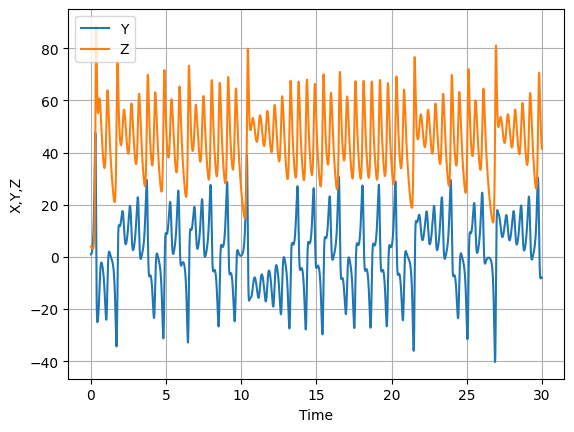

In [33]:
plt.plot(g.xData,  g.yData['v(y)'], label='Y')
plt.plot(g.xData,  g.yData['v(z)'], label='Z')
plt.legend(loc='upper left')
plt.xlabel('Time')
plt.ylabel('X,Y,Z')
plt.grid()
plt.show()

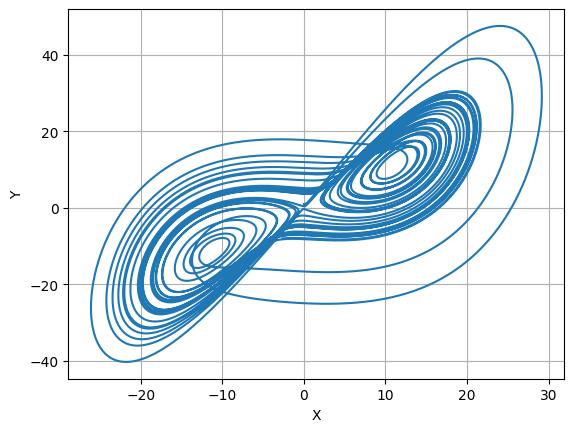

In [29]:
plt.plot( g.yData['v(x)'],  g.yData['v(y)'])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

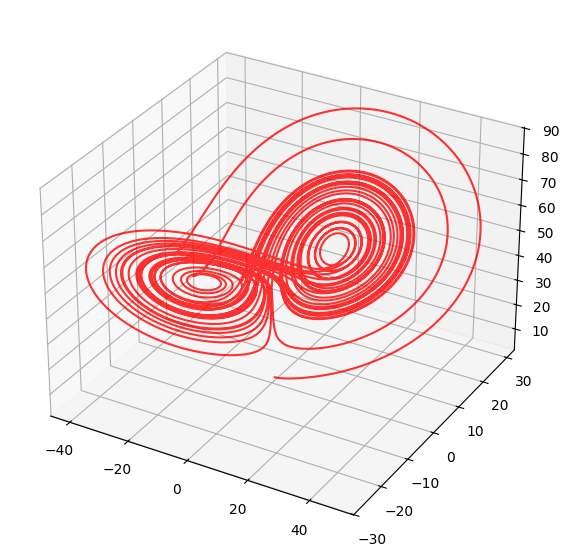

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9, 7))           
ax = fig.add_subplot(111, projection='3d')   
ax.plot(g.yData['v(y)'],  g.yData['v(x)'], g.yData['v(z)'], c='r', alpha=0.8)
plt.show()